<img src="imgs\banner_fcd.jpg" alt="bannersp" width="1100"  height="150">

## <span style="color:#2F749F;"><strong>📦 Sesión práctica 3: Análisis Multivariado</strong></span>
---
<p align="right">
  <a href="https://github.com/mariabda2/intro_data_2025/blob/main/sesiones_practicas/sp_3_maria_bernarda_salazar.ipynb?clone=true" target="_blank">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab"/>
  </a>
</p>


## <span style="color:black;"><strong>Datos del estudiante</strong></span>

In [ ]:
nombre = 'Alejandro Orrego Roldan'
correo= 'alejandro.orregor@udea.edu.co'
print(f'Nombre: {nombre}')
print(f'Correo: {correo}')

Nombre: Alejandro Orrego Roldan
Correo: alejandro.orregor@udea.edu.co


## <span style="color:black;"><strong>Parte 3: Análisis Multivariado</strong></span>

### <span style="color:#2F749F;"><strong>Ejercicio1: Análisis de componentes principales</strong></span>

A partir de un conjunto de datos real sobre pingüinos antárticos, realiza un análisis multivariado utilizando PCA para reducir la dimensionalidad y visualizar agrupamientos por especie.

1. Carga el conjunto de datos penguins desde la librería seaborn `load_dataset("penguins")`.
2. Selecciona las siguientes variables morfológicas para el análisis:
   - 'bill_length_mm'
   - 'bill_depth_mm'
   - 'flipper_length_mm'
   - 'body_mass_g'
3. Estandariza las variables seleccionadas usando StandardScaler.
4. Aplica PCA()
5. Imprime las ecuaciones que obtuviste para el número de componentes que utilizaste
6. Grafica los resultados en un plano bidimensional (PC1 vs PC2), diferenciando por especie (ver imagen).
7. Interpreta visualmente qué especies se agrupan o separan mejor en el espacio reducido.

<p align="center">
    <img src="imgs\sp_3_e1.png" alt="sp_3_e1" width="600"  height="400">
</p>


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
df2 = df.drop(["island", "sex"], axis=1)
df2

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,NaN,NaN,NaN,NaN
4,Adelie,36.7,19.3,193.0,3450.0
...,...,...,...,...,...
339,Gentoo,NaN,NaN,NaN,NaN
340,Gentoo,46.8,14.3,215.0,4850.0
341,Gentoo,50.4,15.7,222.0,5750.0
342,Gentoo,45.2,14.8,212.0,5200.0


In [ ]:
print(len(df2))
df2.info()

344
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   bill_length_mm     342 non-null    float64
 2   bill_depth_mm      342 non-null    float64
 3   flipper_length_mm  342 non-null    float64
 4   body_mass_g        342 non-null    float64
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [ ]:
df2 = df2.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   bill_length_mm     342 non-null    float64
 2   bill_depth_mm      342 non-null    float64
 3   flipper_length_mm  342 non-null    float64
 4   body_mass_g        342 non-null    float64
dtypes: float64(4), object(1)
memory usage: 16.0+ KB


In [ ]:
columns = df2.columns
columns = columns.drop('species')
columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')

In [ ]:
# Estandarizar variables numéricas
scaler = StandardScaler()
X_std = scaler.fit_transform(df2[columns])

In [ ]:
# PCA
pca = PCA()
X_pca = pca.fit_transform(X_std)

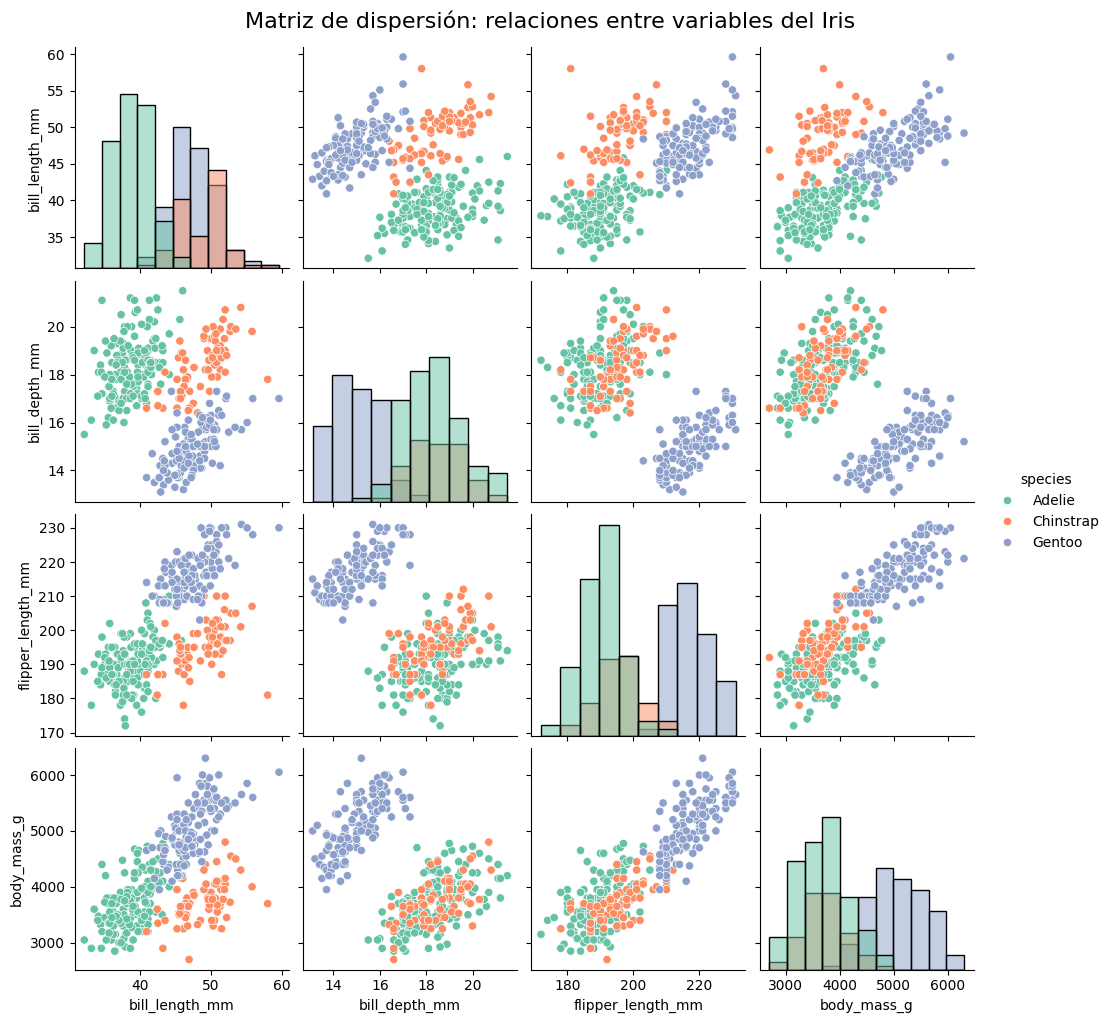

In [ ]:
sns.pairplot(df, hue='species', palette='Set2', diag_kind='hist', corner=False)
plt.suptitle('Matriz de dispersión: relaciones entre variables del Iris', fontsize=16, y=1.02)
plt.show()

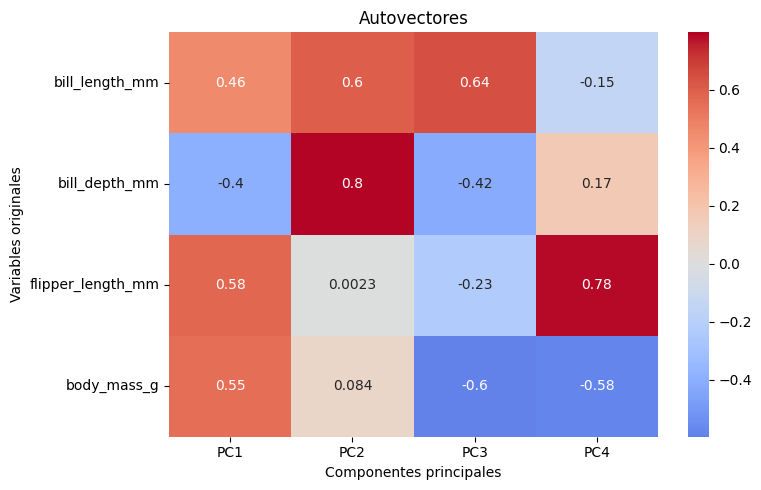

Ecuaciones de los componentes principales:

PC1 = 0.455·'bill_length_mm' + -0.4·'bill_depth_mm' + 0.576·'flipper_length_mm' + 0.548·'body_mass_g'
PC2 = 0.597·'bill_length_mm' + 0.798·'bill_depth_mm' + 0.002·'flipper_length_mm' + 0.084·'body_mass_g'
PC3 = 0.644·'bill_length_mm' + -0.418·'bill_depth_mm' + -0.232·'flipper_length_mm' + -0.597·'body_mass_g'
PC4 = -0.146·'bill_length_mm' + 0.168·'bill_depth_mm' + 0.784·'flipper_length_mm' + -0.58·'body_mass_g'


In [ ]:
# Matriz de componentes
componentes = pd.DataFrame(pca.components_.T,
                           columns=[f'PC{i+1}' for i in range(len(columns))],
                           index=columns)

# 📐 Visualización de autovectores
plt.figure(figsize=(8, 5))
sns.heatmap(componentes, annot=True, cmap='coolwarm', center=0)
plt.title('Autovectores')
plt.ylabel('Variables originales')
plt.xlabel('Componentes principales')
plt.tight_layout()
plt.show()

# Ecuaciones de los componentes principales con nombres reales
print("Ecuaciones de los componentes principales:\n")
for i, comp in enumerate(componentes.columns):
    pesos = pca.components_[i]
    ecuacion = " + ".join([f"{round(pesos[j], 3)}·'{columns[j]}'" for j in range(len(pesos))])
    print(f"{comp} = {ecuacion}")

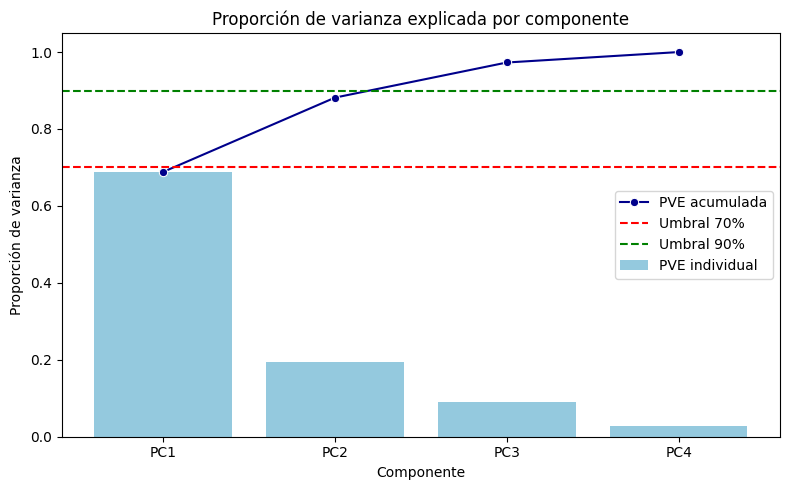

In [ ]:
# Varianza explicada
varianza = pca.explained_variance_
PVE = pca.explained_variance_ratio_
PVE_acum = np.cumsum(PVE)
componentes = [f'PC{i+1}' for i in range(len(PVE))]

# DataFrame para visualización
df_varianza = pd.DataFrame({
    'Componente': componentes,
    'Autovalor': varianza,
    'PVE': PVE,
    'PVE acumulada': PVE_acum
})

# Proporción de varianza explicada
plt.figure(figsize=(8, 5))
sns.barplot(x='Componente', y='PVE', data=df_varianza, color='skyblue', label='PVE individual')
sns.lineplot(x='Componente', y='PVE acumulada', data=df_varianza, marker='o', color='darkblue', label='PVE acumulada')
plt.axhline(0.7, color='red', linestyle='--', label='Umbral 70%')
plt.axhline(0.9, color='green', linestyle='--', label='Umbral 90%')
plt.title('Proporción de varianza explicada por componente')
plt.ylabel('Proporción de varianza')
plt.legend()
plt.tight_layout()
plt.show()

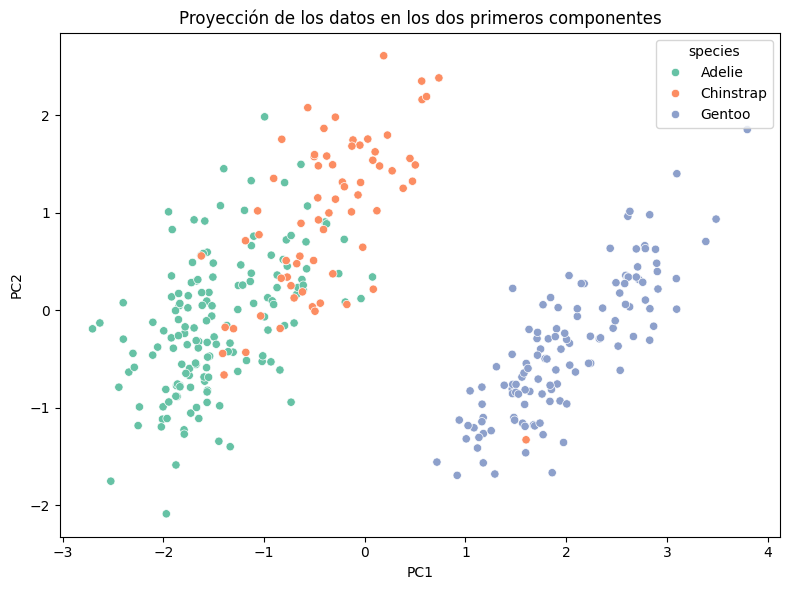

In [ ]:
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(len(PVE))])
correlaciones = df_pca.corr()


df_pca['species'] = df['species']

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='species', palette='Set2')
plt.title('Proyección de los datos en los dos primeros componentes')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

#### Análisis

Con las 2 componentes principales utilizadas, podemos fácilmente determinar que pingüinos probablemente pertenezcan a la especie Gento

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
# Cargar datos Iris
iris = load_iris()

# Crear DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Estandarizar variables numéricas
scaler = StandardScaler()
X_std = scaler.fit_transform(df[iris.feature_names])

# PCA
pca = PCA()
X_pca = pca.fit_transform(X_std)

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### <span style="color:#2F749F;"><strong>Ejercicio 2: Regresión Lineal Múltiple</strong></span>  

A partir de un conjunto de datos real sobre diamantes, realiza un análisis de regresión lineal múltiple para predecir el precio en función de variables numéricas relacionadas con sus características físicas.  

1. Carga el conjunto de datos `diamonds` desde la librería seaborn `load_dataset("diamonds")`.  
2. Selecciona las siguientes variables predictoras para el análisis:  
   - `carat`  
   - `depth`  
   - `table`  
   - `x`  
   - `y`  
   - `z`  
3. Define como variable respuesta el precio (`price`).  
4. Divide los datos en entrenamiento y prueba para validar el modelo.  
5. Ajusta un modelo de **Regresión Lineal Múltiple** usando `statsmodels.OLS()`.  
6. Imprime el resumen del modelo (coeficientes, significancia, R² ajustado, etc.).  
7. Evalúa el desempeño del modelo con métricas de ajuste como **RMSE** y **R²** en el conjunto de prueba.  
8. Grafica los valores reales vs. los valores predichos del precio para interpretar la calidad del ajuste.  

<p align="center">
    <img src="imgs\sp_3_e2.png" alt="sp_3_e2" width="600"  height="400">
</p>



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import shapiro
from scipy.special import kolmogorov
from statsmodels.graphics.gofplots import qqplot
from sklearn.model_selection import train_test_split

# Cargar datos
diamonds = sns.load_dataset("diamonds")
diamonds = diamonds.dropna()

# Mostrar primeras filas
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [ ]:
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]
Y = diamonds['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.30, random_state=42)

In [ ]:
diamonds_clean = diamonds.copy()
diamonds_clean = diamonds_clean.drop(["cut", "color", "clarity"], axis=1)
diamonds_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   depth   53940 non-null  float64
 2   table   53940 non-null  float64
 3   price   53940 non-null  int64  
 4   x       53940 non-null  float64
 5   y       53940 non-null  float64
 6   z       53940 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.9 MB


In [ ]:
# Agregar constante para el intercepto
X_const = sm.add_constant(X_train)

# Ajustar modelo
modelo = sm.OLS(y_train, X_const).fit()

resid = modelo.resid
# Resumen estadístico
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                 3.834e+04
Date:                Thu, 11 Sep 2025   Prob (F-statistic):               0.00
Time:                        14:48:37   Log-Likelihood:            -3.2982e+05
No. Observations:               37758   AIC:                         6.596e+05
Df Residuals:                   37751   BIC:                         6.597e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.057e+04    530.642     38.773      0.0

In [ ]:
len(resid)

37758

In [ ]:
resid

,0
19497,1102.181842
31229,289.568751
22311,3331.655028
278,-1133.910780
6646,325.798955
...,...
11284,-459.031214
44732,-76.433868
38158,336.377569
860,-1303.130517


In [ ]:
import random
aux = resid.sample(n = 1000, random_state=24)

In [ ]:
len(aux)

1000

In [ ]:
aux

,0
42864,423.563402
20480,-453.362336
36986,-45.127989
8208,-576.132807
20809,-4025.558316
...,...
3087,-13.240261
27546,4300.907034
29072,763.135329
41631,42.302235


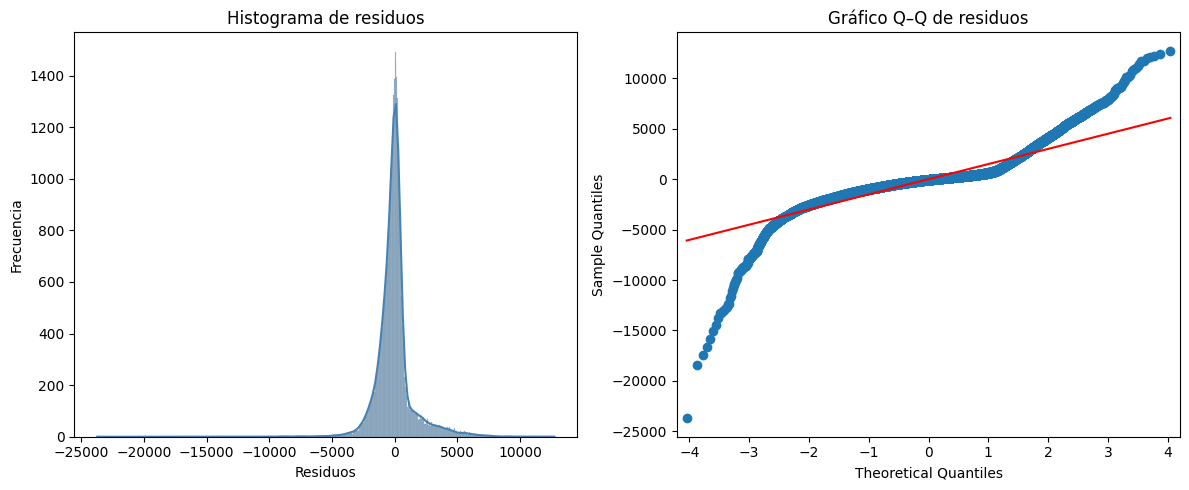

Prueba de Shapiro–Wilk
Estadístico: 0.7882
p-valor: 0.0000 → No se cumple el supuesto de normalidad


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma
sns.histplot(resid, kde=True, ax=axes[0], color='steelblue')
axes[0].set_title("Histograma de residuos")
axes[0].set_xlabel("Residuos")
axes[0].set_ylabel("Frecuencia")

# Q–Q plot
qqplot(resid, line='s', ax=axes[1])
axes[1].set_title("Gráfico Q–Q de residuos")

plt.tight_layout()
plt.show()

# Prueba de Shapiro–Wilk
stat, p_value = shapiro(aux)
print(f"Prueba de Shapiro–Wilk")
print(f"Estadístico: {stat:.4f}")
print(f"p-valor: {p_value:.4f} → {'Se asume normalidad' if p_value > 0.05 else 'No se cumple el supuesto de normalidad'}")

In [ ]:
import scipy.stats as stats

static, p_value = modelo, stats.norm.cdf
print(f"Valor p = {static.pvalues[1]:.4f}")

Valor p = 0.0000


/tmp/ipython-input-3830222043.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Valor p = {static.pvalues[1]:.4f}")


#### Análisis

Gracias a los cálculos y gráficos realizados con anterioridad, podemos deducir que probablemente los datos no cumplen con el principio de normalidad por las siguientes razones.

•	La grafica del histograma de residuos, no es simétrica y presenta un pico muy pronunciado

•	En el grafico de cuantiles de residuos evidenciamos muchos datos (especialmente en las colas) que se alejan de los residuos de una distribución normal

•	Finalmente, tras realizar el test de shapiro-wilk con menos de 5000 datos y el test de Kolmogorov-Smirnov vemos un valor_p igual a 0.000, lo que significa que podemos rechazar el supuesto de que los datos siguen la normalidad.
